In [ ]:
import numpy as np                                  
import pandas as pd                                 #data processing
from sklearn import metrics                         #used to compute accuracy of the model
import sklearn.model_selection as ms                #used to split the data into train and test data
from sklearn.neighbors import KNeighborsClassifier  #used to build knn model

In [ ]:
iris = pd.read_csv("iris.csv")   #inputs the iris dataset

In [ ]:
iris.shape #prints the number of rows and columns of the dataset 'iris'

(150, 6)

In [ ]:
iris.dtypes #gives the data type present in each column of 'iris'

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris[feature_columns].values
y = iris['Species'].values

# Alternative way of selecting features and labels arrays:
# X = iris.iloc[:, 1:4].values
# y = iris.iloc[:, 4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

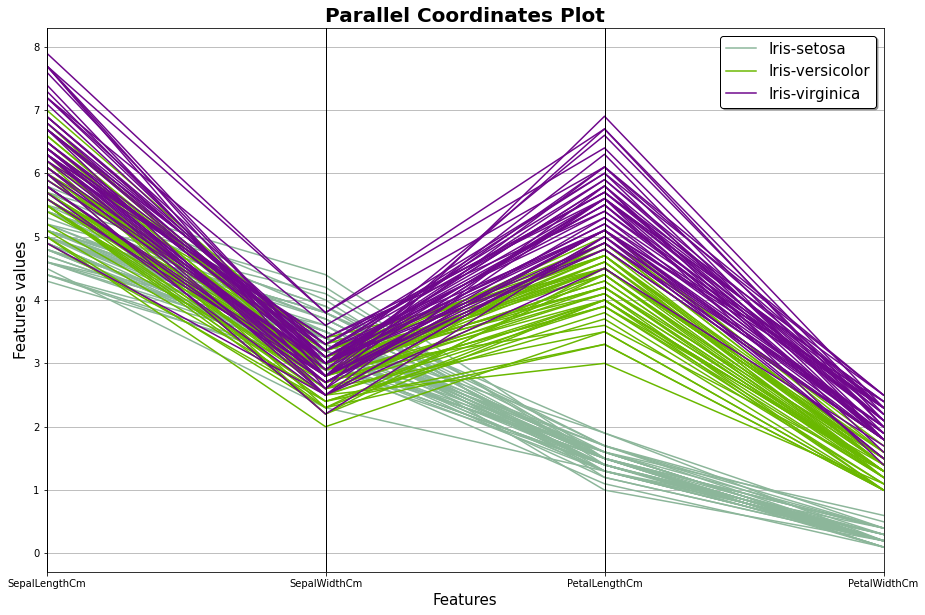

In [ ]:
# Parrarel coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(iris.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

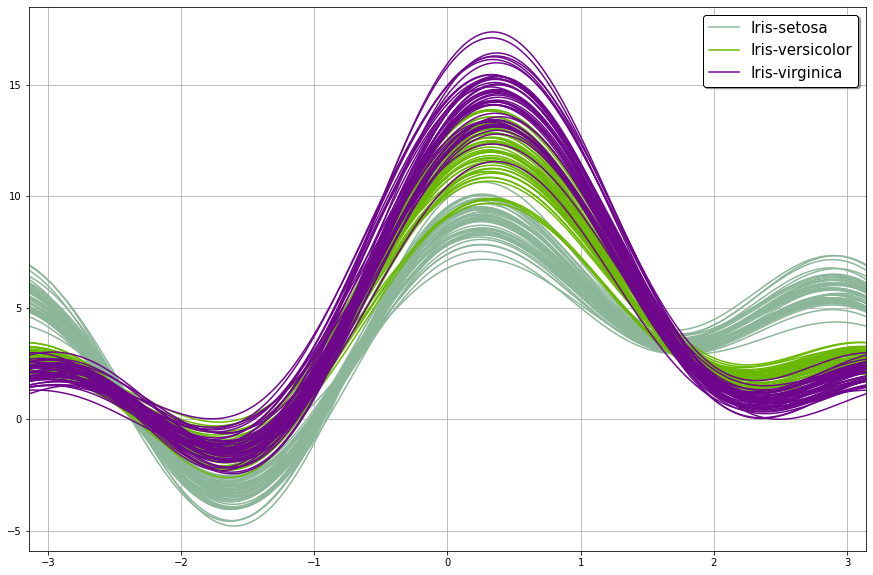

In [ ]:
# Andrew curves
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(iris.drop('Id', axis=1), "Species")
#plt.title("Andrews Curves Plot", fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

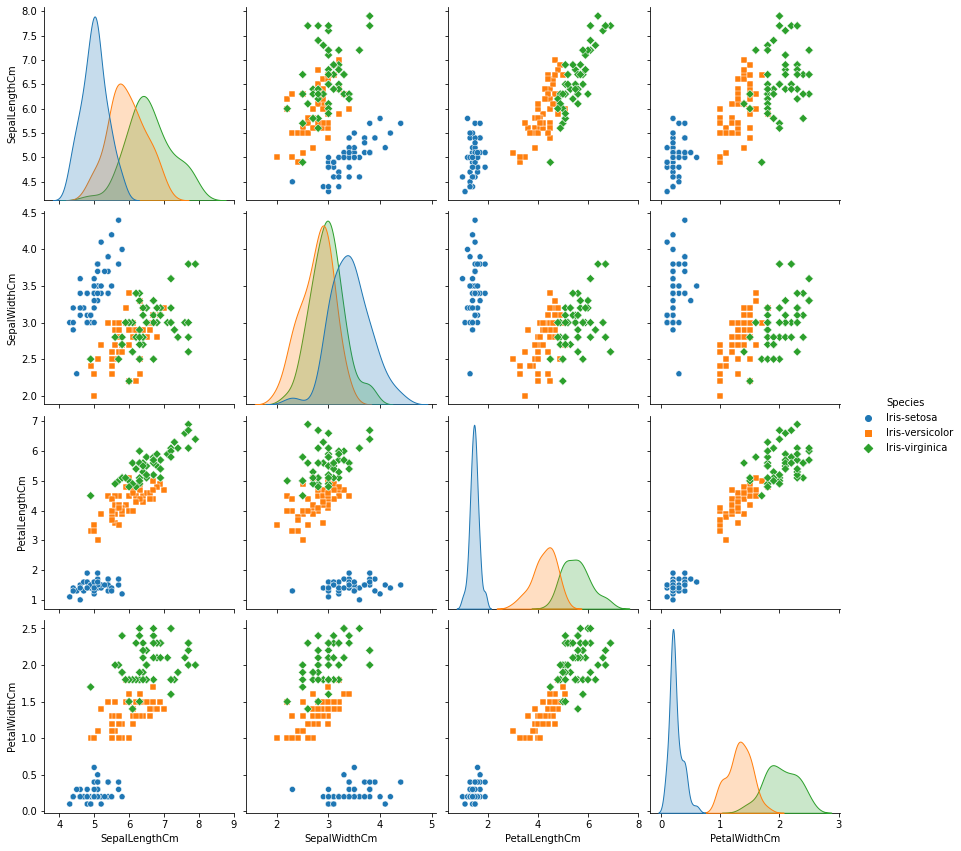

In [ ]:
# Pair plot

plt.figure()
sns.pairplot(iris.drop('Id', axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

<Figure size 432x288 with 0 Axes>

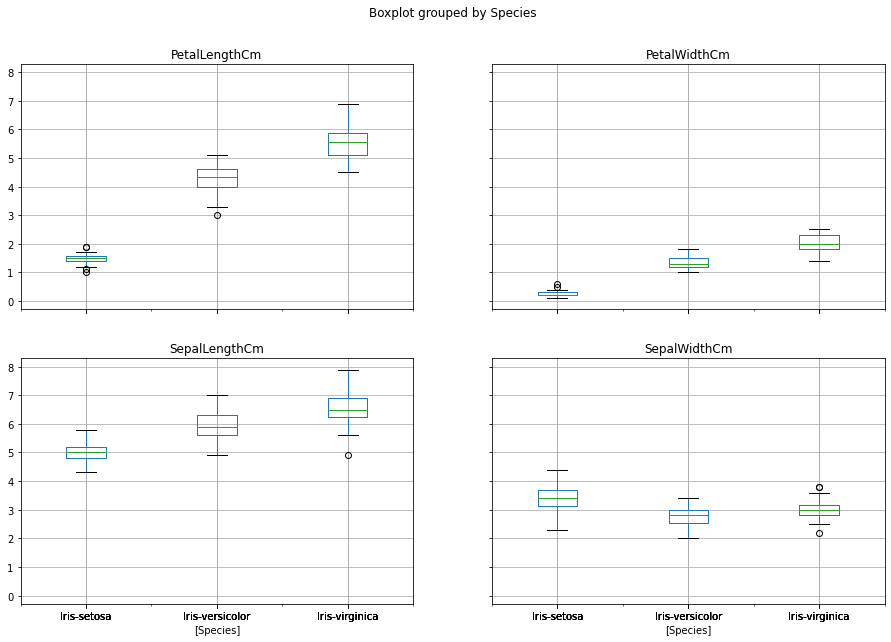

In [ ]:
# Box plot

plt.figure()
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

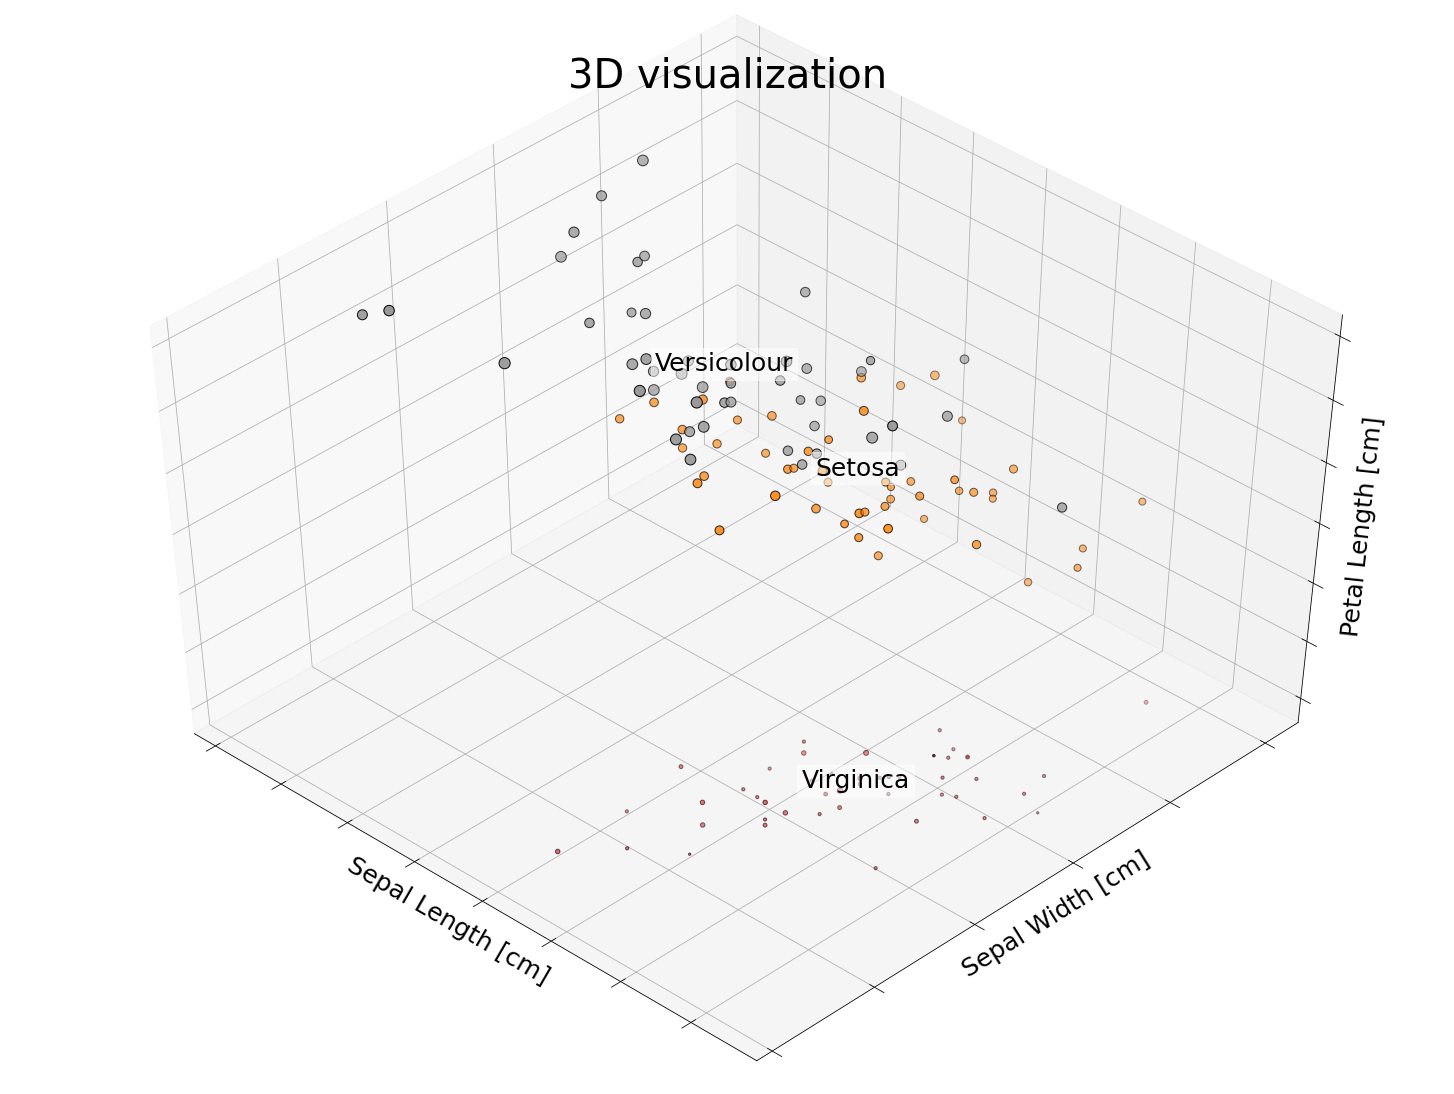

In [ ]:
# 3D visualization

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
#previously used to assign target and feature variables
#y = iris['species'].to_list()     #assigns the 'species' attribute as the target variable
#x = iris.drop("species",axis=1) #x contains all the predictors of y.hence the 'id' and 'species' columns are dropped from iris

In [ ]:
#x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.3,random_state=1) #the dataset is split into train and test data

In [ ]:
#build the knn model for k=7
knn1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)
print("The accuracy of the model: ",metrics.accuracy_score(y_test,y_pred)*100, '%.') 

The accuracy of the model:  100.0 %.


In [ ]:
#To predict the species of 2 unknown iris flowers
unknown = [[76,34,5,2.4],       
           [5,3.9,2,0.3]] #assigning the characteristics of 2 iris flowers of unknown species to unknown
pred = knn1.predict(unknown)  #predicting the species of the unknown iris flowers
print("Predicted species: ", pred)   #print the predicted species

Predicted species:  [2 0]


In [ ]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm

NameError: ignored